In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configs
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Shape and summary
df.shape, df.columns.tolist()

((8807, 12),
 ['show_id',
  'type',
  'title',
  'director',
  'cast',
  'country',
  'date_added',
  'release_year',
  'rating',
  'duration',
  'listed_in',
  'description'])

In [7]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
# Drop rows with missing 'type' or 'title'
df.dropna(subset=['type', 'title'], inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)
df['director'].fillna("No Director", inplace=True)
df['cast'].fillna("No Cast", inplace=True)
df['date_added'].fillna("Unknown", inplace=True)

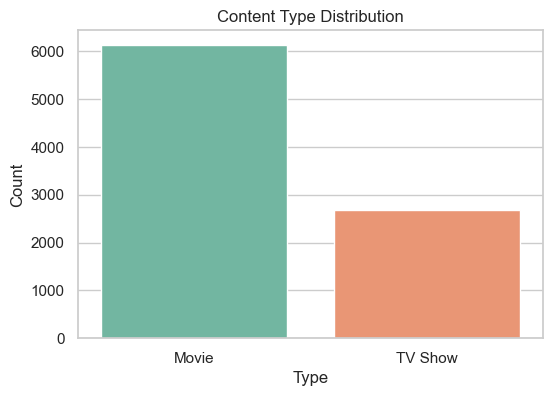

In [9]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

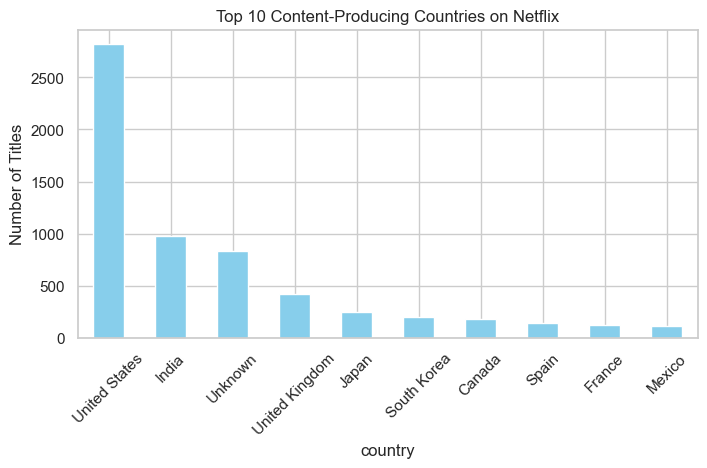

In [10]:
# Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

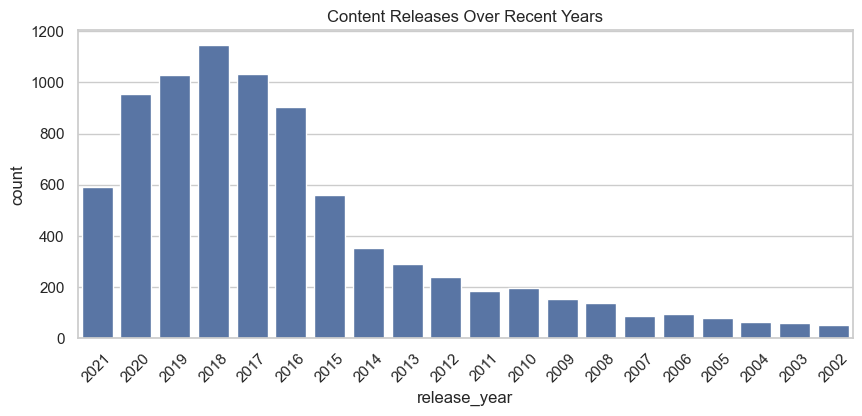

In [11]:
# Content release trend by year
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique(), reverse=True)[:20])
plt.title("Content Releases Over Recent Years")
plt.xticks(rotation=45)
plt.show()

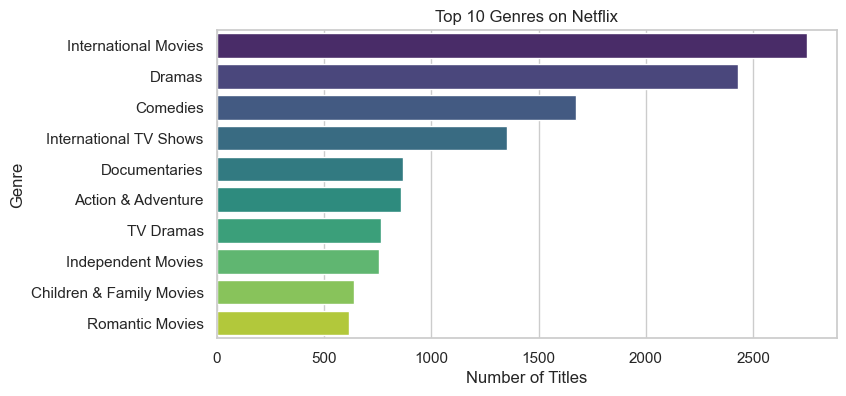

In [12]:
# Extract genres
from collections import Counter
genre_list = ','.join(df['listed_in']).split(',')
genre_counts = Counter([g.strip() for g in genre_list])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(8,4))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

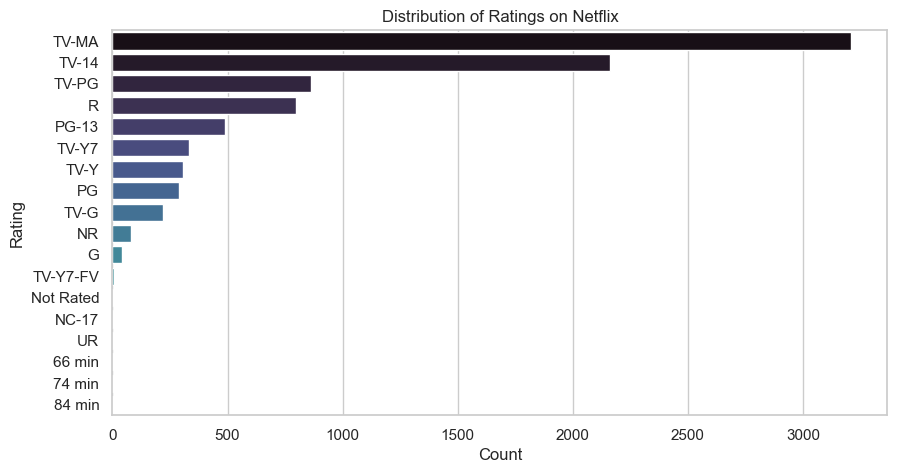

In [13]:
# Ratings
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='mako')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

## Justification

Streaming platforms like Netflix are shaping global media consumption. This dataset is valuable for understanding:
- Trends in movie/TV content over time
- Popular genres and formats
- Country-wise production patterns
- Viewer ratings and maturity categories

Such insights are useful for media analysts, marketers, and producers aiming to align content with audience preferences.

## Interpretations

- **Movies dominate** over TV shows on Netflix.
- **United States, India, UK, and Canada** produce the most Netflix content.
- There's a **sharp rise in content after 2010**, showing Netflix's growth.
- **Top genres** include Dramas, Comedies, and International content.
- **TV-MA and TV-14** are the most common maturity ratings, indicating a focus on mature audiences.

This analysis offers valuable insights into content strategies, consumer trends, and production patterns on streaming platforms like Netflix.
